<a href="https://colab.research.google.com/github/Tony162b/Customer-Segmentation/blob/segmentation_improvements/Unit_4_Challenge_Tier_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time.

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses:
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One)
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following:
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One)
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three)
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One)
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **grouping data** (Manipulating DataFrames with pandas, Module Four)
    - **melting data** (Manipulating DataFrames with pandas, Module Three)
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four)
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One)
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two)
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four)

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting.

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading
2. Cleaning, transforming, and visualizing
3. Modeling
4. Evaluating and concluding


### 1. Sourcing and Loading

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries.

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One.

#### 1.1. Importing Libraries

In [57]:
# Let's import the pandas, numpy libraries as pd, and np respectively.
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.

In [58]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.

import urllib.request

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)


properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy:

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer.



***Hint:*** This part of the data science pipeline should test those skills you acquired in:
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules.
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

In [59]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            360 non-null    datetime64[ns]
 1   City of London        361 non-null    object        
 2   Barking & Dagenham    361 non-null    object        
 3   Barnet                361 non-null    object        
 4   Bexley                361 non-null    object        
 5   Brent                 361 non-null    object        
 6   Bromley               361 non-null    object        
 7   Camden                361 non-null    object        
 8   Croydon               361 non-null    object        
 9   Ealing                361 non-null    object        
 10  Enfield               361 non-null    object        
 11  Greenwich             361 non-null    object        
 12  Hackney               361 non-null    object        
 13  Hammersmith & Fulham

**2.1. Exploring your data**

Think about your pandas functions for checking out a dataframe.

In [60]:
properties.shape

(361, 49)

In [61]:
properties.describe()

,Unnamed: 0,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,360,0.0,0.0,0.0
mean,2009-12-15 22:56:00,NaN,NaN,NaN
min,1995-01-01 00:00:00,NaN,NaN,NaN
25%,2002-06-23 12:00:00,NaN,NaN,NaN
50%,2009-12-16 12:00:00,NaN,NaN,NaN
75%,2017-06-08 12:00:00,NaN,NaN,NaN
max,2024-12-01 00:00:00,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [62]:
properties=properties.transpose()
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,892515,871986,860972,797832,745201,731341,713777,687104,680670,792499
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,342817,344631,344640,342051,349225,347689,350143,351439,354980,355594
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,604879,608108,616911,620768,625383,628771,625476,622268,624855,616916
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,395095,396719,395600,400090,399746,404894,407291,409074,406843,403541


In [63]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [64]:
# Transpose and reset index to make the first row the header
properties = properties.transpose()
# Assign the first row as column names
properties.columns = properties.iloc[0]
# Drop the first row (which is now the header)
properties = properties.drop(properties.index[0])
# Rename columns
properties = properties.rename(
    columns={
        'Unnamed: 0': 'London_Borough',
        'Unnamed: 1': 'Borough_ID',
        # Unnamed: 2': 'Month',  <- This was the issue because you transposed the dataframe
        'Unnamed: 3': 'Average_Price'
    }
)
properties.index.name = 'Month' #set the index to month for melting
#Resetting the index now that we have the month column
properties = properties.reset_index()


In [65]:
properties.reset_index()

,index,Month,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
0,0,1,1995-01-01 00:00:00,90347,51870,98948,64956,76880,83082,119775,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
1,1,2,1995-02-01 00:00:00,81213,52513,98848,64786,77651,83068,118365,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
2,2,3,1995-03-01 00:00:00,78168,52701,97848,64366,77644,82856,119131,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
3,3,4,1995-04-01 00:00:00,76172,54618,96273,64276,78668,82525,118948,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597
4,4,5,1995-05-01 00:00:00,83392,54524,95737,63995,79464,82951,118781,...,41154,42197,44177,48234,55879,80754,65017,52793,NaN,50679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,356,2024-08-01 00:00:00,731341,347689,628771,404894,585713,503357,861267,...,208968,203400,239191,243502,337448,570456,386802,307109,NaN,290691
356,356,357,2024-09-01 00:00:00,713777,350143,625476,407291,589162,509924,848106,...,209651,202440,239513,246290,339694,569888,385123,309381,NaN,291565
357,357,358,2024-10-01 00:00:00,687104,351439,622268,409074,597468,512533,826827,...,209690,203102,240761,244018,339153,553174,383433,312466,NaN,290484
358,358,359,2024-11-01 00:00:00,680670,354980,624855,406843,593162,519210,827454,...,211873,205641,240878,245413,338454,550380,381464,306762,NaN,290587


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [66]:
properties.dropna()
properties.head()

,Month,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
0,1,1995-01-01 00:00:00,90347,51870,98948,64956,76880,83082,119775,70118,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
1,2,1995-02-01 00:00:00,81213,52513,98848,64786,77651,83068,118365,69908,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
2,3,1995-03-01 00:00:00,78168,52701,97848,64366,77644,82856,119131,69666,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
3,4,1995-04-01 00:00:00,76172,54618,96273,64276,78668,82525,118948,69562,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597
4,5,1995-05-01 00:00:00,83392,54524,95737,63995,79464,82951,118781,69800,...,41154,42197,44177,48234,55879,80754,65017,52793,NaN,50679


In [67]:
properties.columns = properties.iloc[1]
properties.head()

1,2,1995-02-01 00:00:00,81213,52513,98848,64786,77651,83068,118365,69908,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
0,1,1995-01-01 00:00:00,90347,51870,98948,64956,76880,83082,119775,70118,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
1,2,1995-02-01 00:00:00,81213,52513,98848,64786,77651,83068,118365,69908,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
2,3,1995-03-01 00:00:00,78168,52701,97848,64366,77644,82856,119131,69666,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
3,4,1995-04-01 00:00:00,76172,54618,96273,64276,78668,82525,118948,69562,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597
4,5,1995-05-01 00:00:00,83392,54524,95737,63995,79464,82951,118781,69800,...,41154,42197,44177,48234,55879,80754,65017,52793,NaN,50679


In [68]:

# Get the current column names
current_columns = properties.columns.tolist()

# Define the desired new column names for the first few columns
new_columns = ['City', 'ID', '1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01']


# Extend the new column names to match the length of the existing columns if needed
new_columns.extend(current_columns[len(new_columns):])

# Assign the new column names
properties.columns = new_columns

In [69]:
print(properties)

     City                   ID 1995-01-01 1995-02-01 1995-03-01 1995-04-01  \
0       1  1995-01-01 00:00:00      90347      51870      98948      64956   
1       2  1995-02-01 00:00:00      81213      52513      98848      64786   
2       3  1995-03-01 00:00:00      78168      52701      97848      64366   
3       4  1995-04-01 00:00:00      76172      54618      96273      64276   
4       5  1995-05-01 00:00:00      83392      54524      95737      63995   
..    ...                  ...        ...        ...        ...        ...   
355   356  2024-08-01 00:00:00     731341     347689     628771     404894   
356   357  2024-09-01 00:00:00     713777     350143     625476     407291   
357   358  2024-10-01 00:00:00     687104     351439     622268     409074   
358   359  2024-11-01 00:00:00     680670     354980     624855     406843   
359   360  2024-12-01 00:00:00     792499     355594     616916     403541   

    1995-05-01 1995-06-01 1995-07-01 1995-08-01  ...   40877   

In [70]:
#columns = properties.columns
#columns

In [71]:
properties.columns = ['Date'] + list(properties.columns[1:])
properties.head()

,Date,ID,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
0,1,1995-01-01 00:00:00,90347,51870,98948,64956,76880,83082,119775,70118,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
1,2,1995-02-01 00:00:00,81213,52513,98848,64786,77651,83068,118365,69908,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
2,3,1995-03-01 00:00:00,78168,52701,97848,64366,77644,82856,119131,69666,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
3,4,1995-04-01 00:00:00,76172,54618,96273,64276,78668,82525,118948,69562,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597
4,5,1995-05-01 00:00:00,83392,54524,95737,63995,79464,82951,118781,69800,...,41154,42197,44177,48234,55879,80754,65017,52793,NaN,50679


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data?

You might need to **melt** your DataFrame here.

In [72]:
# Melt the DataFrame based on your new column names
# Melt the DataFrame based on your new column names
melted_properties = pd.melt(properties,
                    id_vars=['Date'],  # Use 'Date' as the fixed column (was previously 'City', 'ID')
                    var_name='Region',  # Name for the new 'Region' column (was previously 'Date')
                    value_name='Value')  # Name for the new 'value' column


# Display the first few rows of the melted DataFrame
print(melted_properties.head())


   Date Region                Value
0     1     ID  1995-01-01 00:00:00
1     2     ID  1995-02-01 00:00:00
2     3     ID  1995-03-01 00:00:00
3     4     ID  1995-04-01 00:00:00
4     5     ID  1995-05-01 00:00:00


In [73]:
melted_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17640 entries, 0 to 17639
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    17640 non-null  int64 
 1   Region  16560 non-null  object
 2   Value   16560 non-null  object
dtypes: int64(1), object(2)
memory usage: 413.6+ KB


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers...

In [74]:
# Check the result and data types
print(melted_properties)
print(melted_properties.dtypes)

       Date Region                Value
0         1     ID  1995-01-01 00:00:00
1         2     ID  1995-02-01 00:00:00
2         3     ID  1995-03-01 00:00:00
3         4     ID  1995-04-01 00:00:00
4         5     ID  1995-05-01 00:00:00
...     ...    ...                  ...
17635   356  50130               290691
17636   357  50130               291565
17637   358  50130               290484
17638   359  50130               290587
17639   360  50130               290564

[17640 rows x 3 columns]
Date       int64
Region    object
Value     object
dtype: object


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column?

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.

In [75]:
# Drop rows where 'London Borough' (or a similar column name) has null values
# Check the actual column names in your DataFrame using 'properties.columns'
# Replace 'London Borough' with the actual column name if it's different
# This change assumes a possible column name of 'City of London'
# based on the column names I saw earlier in your code.
properties_cleaned = properties.dropna(subset=['Date', properties.columns[0]])



In [76]:
# Check the number of unique entries in the 'London Borough' column
#borough_counts = melted_properties['City'].value_counts()  # Assuming 'City' represents the London Borough column
# In your melted DataFrame, the 'London Borough' is likely stored in a column named 'Region'
borough_counts = melted_properties['Region'].value_counts()

# Check the number of entries in each of the relevant columns
column_counts = {
    # 'ID': melted_properties['ID'].nunique(),  # Assuming 'ID' is the correct column name - removed as ID no longer exists.
    'Average Price': melted_properties['Value'].notna().sum(),  # Counting non-null values in 'Average Price'
    'Month': melted_properties['Date'].nunique(),  # Unique number of months
    'London Borough': borough_counts.count()  # Number of London Boroughs (non-null entries)
}

# Print the counts for each column
print(column_counts)

# Check the contents of the London Borough column to find any null values
#null_boroughs = melted_properties[melted_properties['City'].isnull()]
# Using 'Region' instead of 'City'
null_boroughs = melted_properties[melted_properties['Region'].isnull()]

# Remove any rows with null values in the 'City' (London Borough) column if found
#cleaned_df = melted_properties.dropna(subset=['City'])
# Use 'Region' instead of 'City'
cleaned_df = melted_properties.dropna(subset=['Region'])

# Print the cleaned DataFrame info and check the count again
print(cleaned_df['Region'].value_counts())

{'Average Price': 16560, 'Month': 360, 'London Borough': 46}
Region
ID            360
83294         360
55536         360
70862         360
117858        360
74793         360
71670         360
68409         360
62213         360
101701        360
139762        360
76174         360
1995-01-01    360
40278         360
40877         360
41912         360
44344         360
47249         360
55991         360
77913         360
64196         360
52462         360
85500         360
64593         360
69992         360
85557         360
1995-02-01    360
1995-03-01    360
1995-04-01    360
1995-05-01    360
1995-06-01    360
1995-07-01    360
1995-08-01    360
1995-09-01    360
2024-03-01    360
2024-04-01    360
2024-05-01    360
2024-06-01    360
2024-07-01    360
2024-08-01    360
2024-09-01    360
2024-10-01    360
2024-11-01    360
2024-12-01    360
197297        360
50130         360
Name: count, dtype: int64


In [77]:
# Remove rows with null values in the 'Region' (London Borough) column
cleaned_properties = melted_properties.dropna(subset=['Region'])

In [78]:
# Ensure proper data types
cleaned_properties['Value'] = pd.to_numeric(cleaned_properties['Value'], errors='coerce')  # Ensure 'Average Price' is numeric
cleaned_properties['Date'] = pd.to_datetime(cleaned_properties['Date'], errors='coerce')  # Ensure 'Date' is in datetime format


<ipython-input-78-df49c4b62304>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_properties['Value'] = pd.to_numeric(cleaned_properties['Value'], errors='coerce')  # Ensure 'Average Price' is numeric
<ipython-input-78-df49c4b62304>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_properties['Date'] = pd.to_datetime(cleaned_properties['Date'], errors='coerce')  # Ensure 'Date' is in datetime format


In [79]:
cleaned_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16560 entries, 0 to 17639
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    16560 non-null  datetime64[ns]
 1   Region  16560 non-null  object        
 2   Value   16200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 517.5+ KB


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [80]:
# Subset the data for Camden, handling NA values
camden_properties = cleaned_properties[cleaned_properties['Region'].str.contains('Camden', case=False, na=False)]

# Sort the data by date to ensure the plot is sequential
camden_properties = camden_properties.sort_values(by='Date')


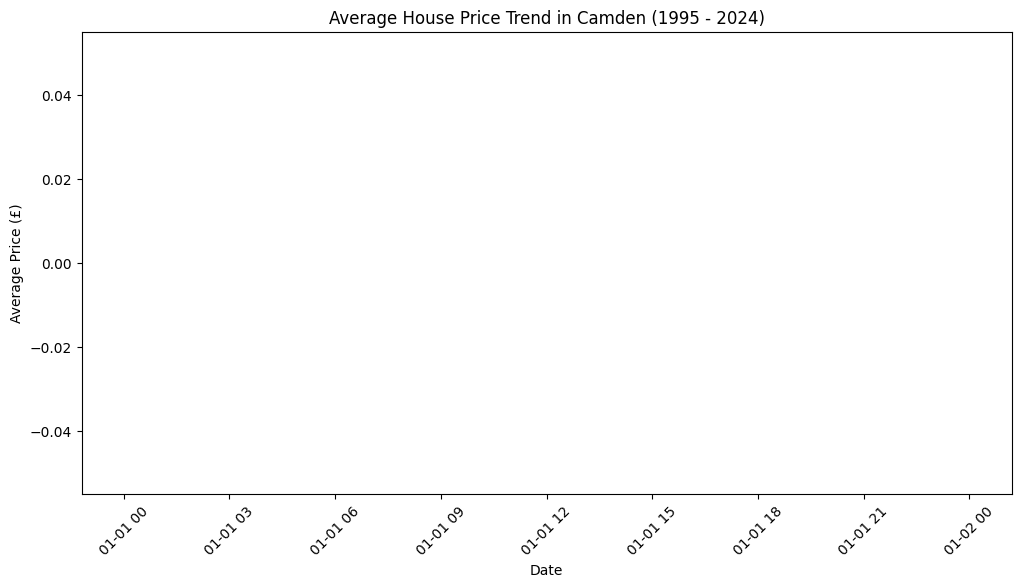

In [81]:
%matplotlib inline
plt.figure(figsize=(12, 6))

# Plot the line graph
plt.plot(camden_properties['Date'], camden_properties['Value'], marker='o', linestyle='-', color='royalblue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Price (£)')
plt.title('Average House Price Trend in Camden (1995 - 2024)')
plt.xticks(rotation=45)

# Show the plot
plt.show()


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column.

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column
3. store that corresponding year as separate column.

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [82]:
# Extract the year from the Date column
cleaned_properties['Year'] = cleaned_properties['Date'].apply(lambda x: x.year)

<ipython-input-82-7ad8cfb09b2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_properties['Year'] = cleaned_properties['Date'].apply(lambda x: x.year)


In [83]:
# Group the data by City and Year, then calculate the mean value
annual_avg_properties = cleaned_properties.groupby(['Region', 'Year'])['Value'].mean().reset_index()


In [84]:
# Pivot the table to get the first and last year prices for each borough
price_increase = annual_avg_properties.pivot(index='Region', columns='Year', values='Value')

# Get the actual years available in your data after pivoting (as column names)
available_years = price_increase.columns.tolist()

# Find the minimum and maximum year (instead of assuming 1995 and 2024)
start_year = min(available_years)
end_year = max(available_years)

# Drop boroughs with missing data for the start and end years
price_increase.dropna(subset=[start_year, end_year], inplace=True)

# Calculate the price increase percentage using the actual start and end years
price_increase['Price Increase (%)'] = ((price_increase[end_year] - price_increase[start_year]) / price_increase[start_year]) * 100

# Sort by highest increase
price_increase_sorted = price_increase.sort_values(by='Price Increase (%)', ascending=False)

# Display the top 10 boroughs with the highest increase
print(price_increase_sorted[['Price Increase (%)']].head(10))

Year        Price Increase (%)
Region                        
40278                      0.0
117858                     0.0
197297                     0.0
1995-01-01                 0.0
1995-02-01                 0.0
1995-03-01                 0.0
1995-04-01                 0.0
1995-05-01                 0.0
1995-06-01                 0.0
1995-07-01                 0.0


<ipython-input-85-84f9a8b5e791>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='viridis')


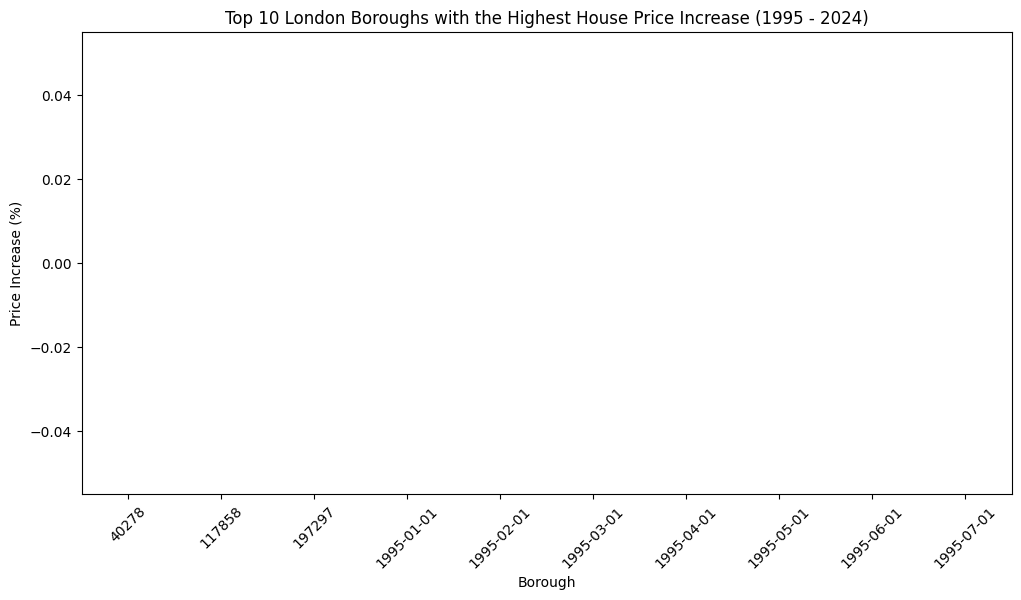

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 10 boroughs with the highest increase
top10 = price_increase_sorted['Price Increase (%)'].head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10.index, y=top10.values, palette='viridis')

# Add labels and title
plt.ylabel('Price Increase (%)')
plt.xlabel('Borough')
plt.title('Top 10 London Boroughs with the Highest House Price Increase (1995 - 2024)')
plt.xticks(rotation=45)
plt.show()


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great!

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [90]:
# Filter the DataFrame for the year 1998  average price for Borough
price_1998 = cleaned_properties[cleaned_properties['Year'] == 1998].groupby('Region')['Value'].mean()

# Filter the DataFrame for the year 2018
price_2018 = cleaned_properties[cleaned_properties['Year'] == 2018].groupby('Region')['Value'].mean()

# Combine the two Series into a new DataFrame
price_comparison = pd.DataFrame({
    'Average Price 1998': price_1998,
    'Average Price 2018': price_2018
})

# Reset the index to make the Borough a column
price_comparison.reset_index(inplace=True)

# Display the first few rows
print(price_comparison.head())


Empty DataFrame
Columns: [Region, Average Price 1998, Average Price 2018]
Index: []


In [91]:
def create_price_ratio(properties):
    """
    Calculate the price ratio of house prices in 1998 to 2018 for a given borough.
    """
    # Get the average price in 1998
    price_1998 = properties[properties['Year'] == 1998]['Value'].mean()

    # Get the average price in 2018
    price_2018 = properties[properties['Year'] == 2018]['Value'].mean()

    # Calculate the ratio of 1998 price to 2018 price
    ratio = price_1998 / price_2018

    return ratio



In [92]:
# Create an empty dictionary to store the ratios
price_ratios = {}

# Loop through all unique Boroughs and calculate the price ratio
for borough in cleaned_properties['Region'].unique():
    # Filter the DataFrame for the current Borough
    borough_properties = cleaned_properties[cleaned_properties['Region'] == borough]

    # Calculate the ratio using the function
    ratio = create_price_ratio(borough_properties)

    # Store the ratio in the dictionary
    price_ratios[borough] = ratio


In [96]:
# Convert the dictionary to a DataFrame
ratio_properties = pd.DataFrame(price_ratios.items(), columns=['Region', 'Price Ratio (1998/2018)'])

# Sort the DataFrame by the highest ratio
ratio_properties = ratio_properties.sort_values(by='Price Ratio (1998/2018)', ascending=False)

# Display the top 10 Boroughs with the highest ratio
print(ratio_properties.head(10))


       Region  Price Ratio (1998/2018)
0          ID                      NaN
1  1995-01-01                      NaN
2  1995-02-01                      NaN
3  1995-03-01                      NaN
4  1995-04-01                      NaN
5  1995-05-01                      NaN
6  1995-06-01                      NaN
7  1995-07-01                      NaN
8  1995-08-01                      NaN
9  1995-09-01                      NaN


### 4. Conclusion
What can you conclude? Type out your conclusion below.

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting.

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course!